# Advanced Regression
___
## Data: Wine Quality 

The [Wine Quality](http://archive.ics.uci.edu/ml/datasets/Wine+Quality) dataset contains data on samples of white vinho verde wine. There are various attributes based on physicochemical tests as well as a quality attribute. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')

In [2]:
df = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
df.columns = ['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [4]:
df.shape

(4898, 12)

In [5]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Exploration

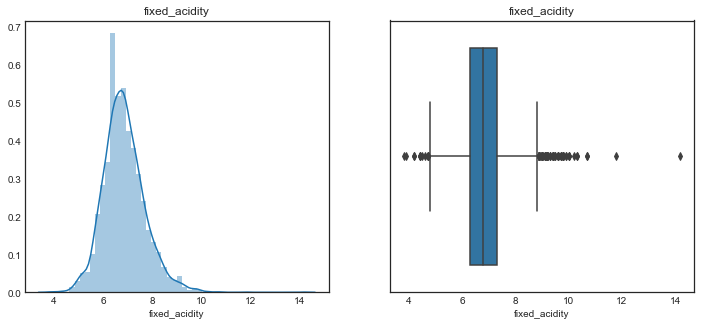

In [6]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['fixed_acidity'])
plt.title('fixed_acidity')

plt.subplot(1, 2, 2)
sns.boxplot(df['fixed_acidity'])
plt.title('fixed_acidity')

plt.show()

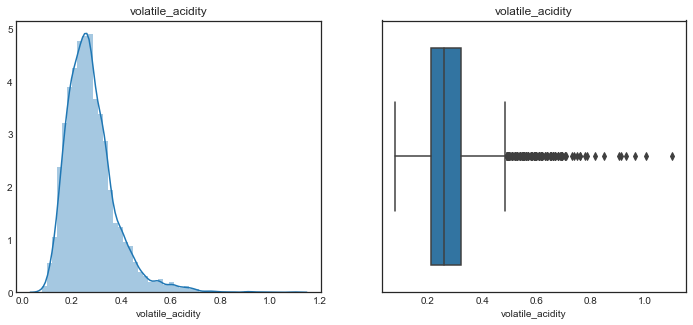

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['volatile_acidity'])
plt.title('volatile_acidity')

plt.subplot(1, 2, 2)
sns.boxplot(df['volatile_acidity'])
plt.title('volatile_acidity')

plt.show()

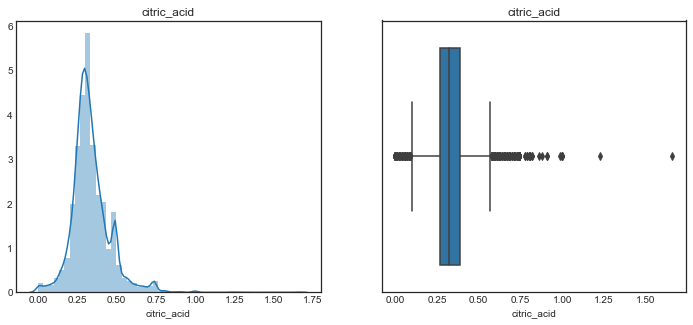

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['citric_acid'])
plt.title('citric_acid')

plt.subplot(1, 2, 2)
sns.boxplot(df['citric_acid'])
plt.title('citric_acid')

plt.show()

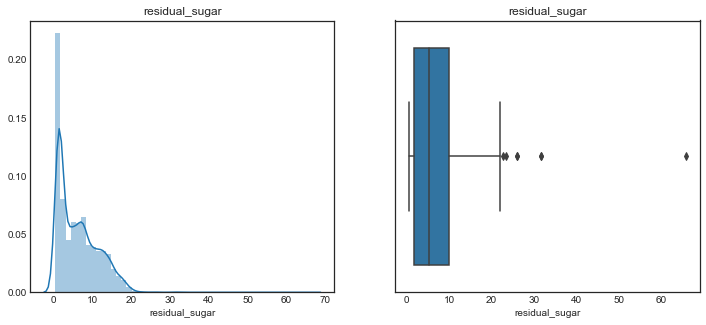

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['residual_sugar'])
plt.title('residual_sugar')

plt.subplot(1, 2, 2)
sns.boxplot(df['residual_sugar'])
plt.title('residual_sugar')

plt.show()

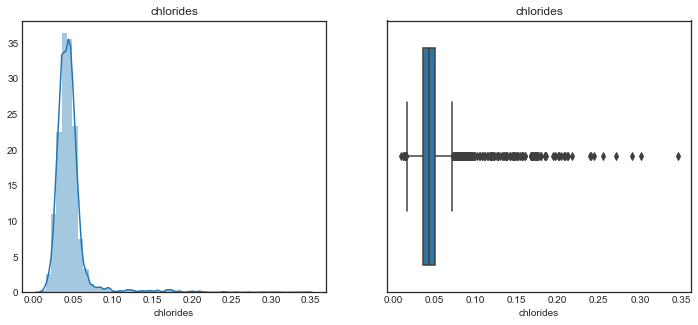

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['chlorides'])
plt.title('chlorides')

plt.subplot(1, 2, 2)
sns.boxplot(df['chlorides'])
plt.title('chlorides')

plt.show()

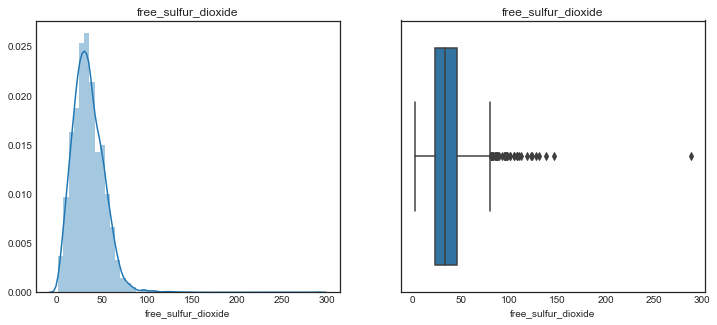

In [13]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['free_sulfur_dioxide'])
plt.title('free_sulfur_dioxide')

plt.subplot(1, 2, 2)
sns.boxplot(df['free_sulfur_dioxide'])
plt.title('free_sulfur_dioxide')

plt.show()

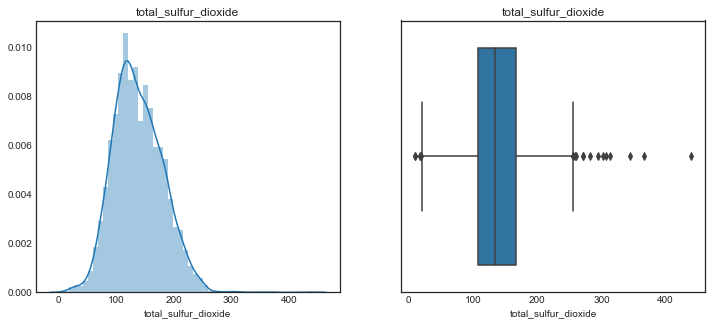

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['total_sulfur_dioxide'])
plt.title('total_sulfur_dioxide')

plt.subplot(1, 2, 2)
sns.boxplot(df['total_sulfur_dioxide'])
plt.title('total_sulfur_dioxide')

plt.show()

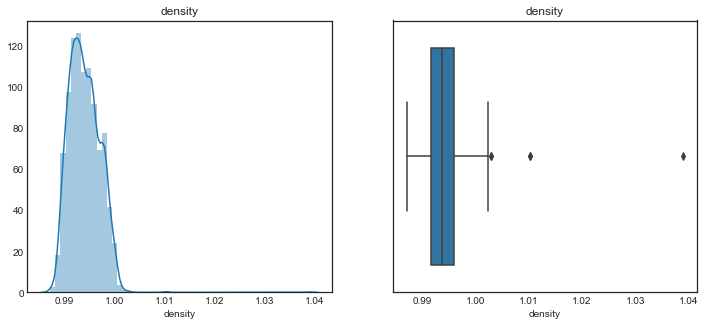

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['density'])
plt.title('density')

plt.subplot(1, 2, 2)
sns.boxplot(df['density'])
plt.title('density')

plt.show()

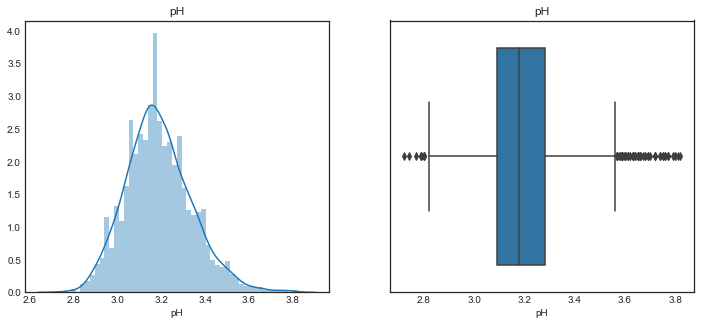

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['pH'])
plt.title('pH')

plt.subplot(1, 2, 2)
sns.boxplot(df['pH'])
plt.title('pH')

plt.show()

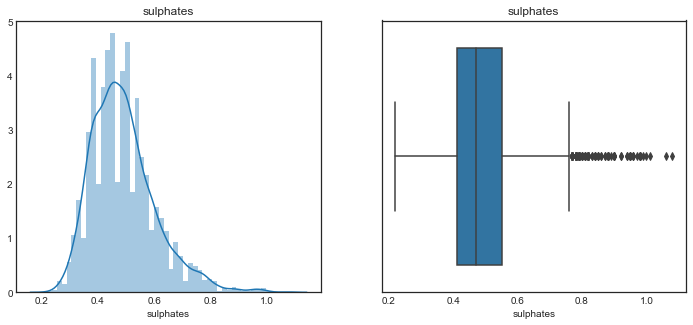

In [17]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['sulphates'])
plt.title('sulphates')

plt.subplot(1, 2, 2)
sns.boxplot(df['sulphates'])
plt.title('sulphates')

plt.show()

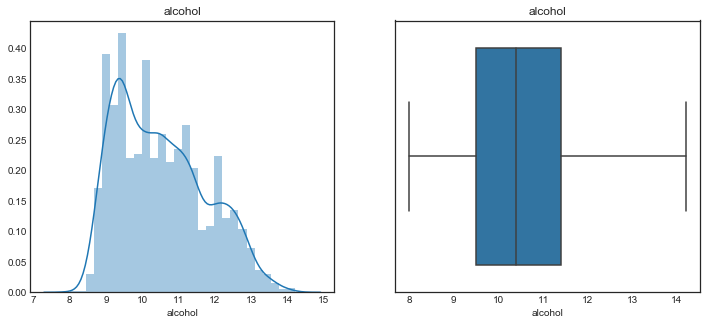

In [19]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['alcohol'])
plt.title('alcohol')

plt.subplot(1, 2, 2)
sns.boxplot(df['alcohol'])
plt.title('alcohol')

plt.show()

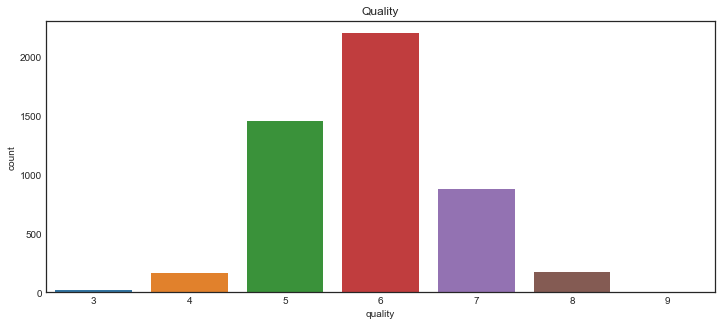

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x="quality", data=df)
plt.title('Quality')
plt.show()

In [25]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

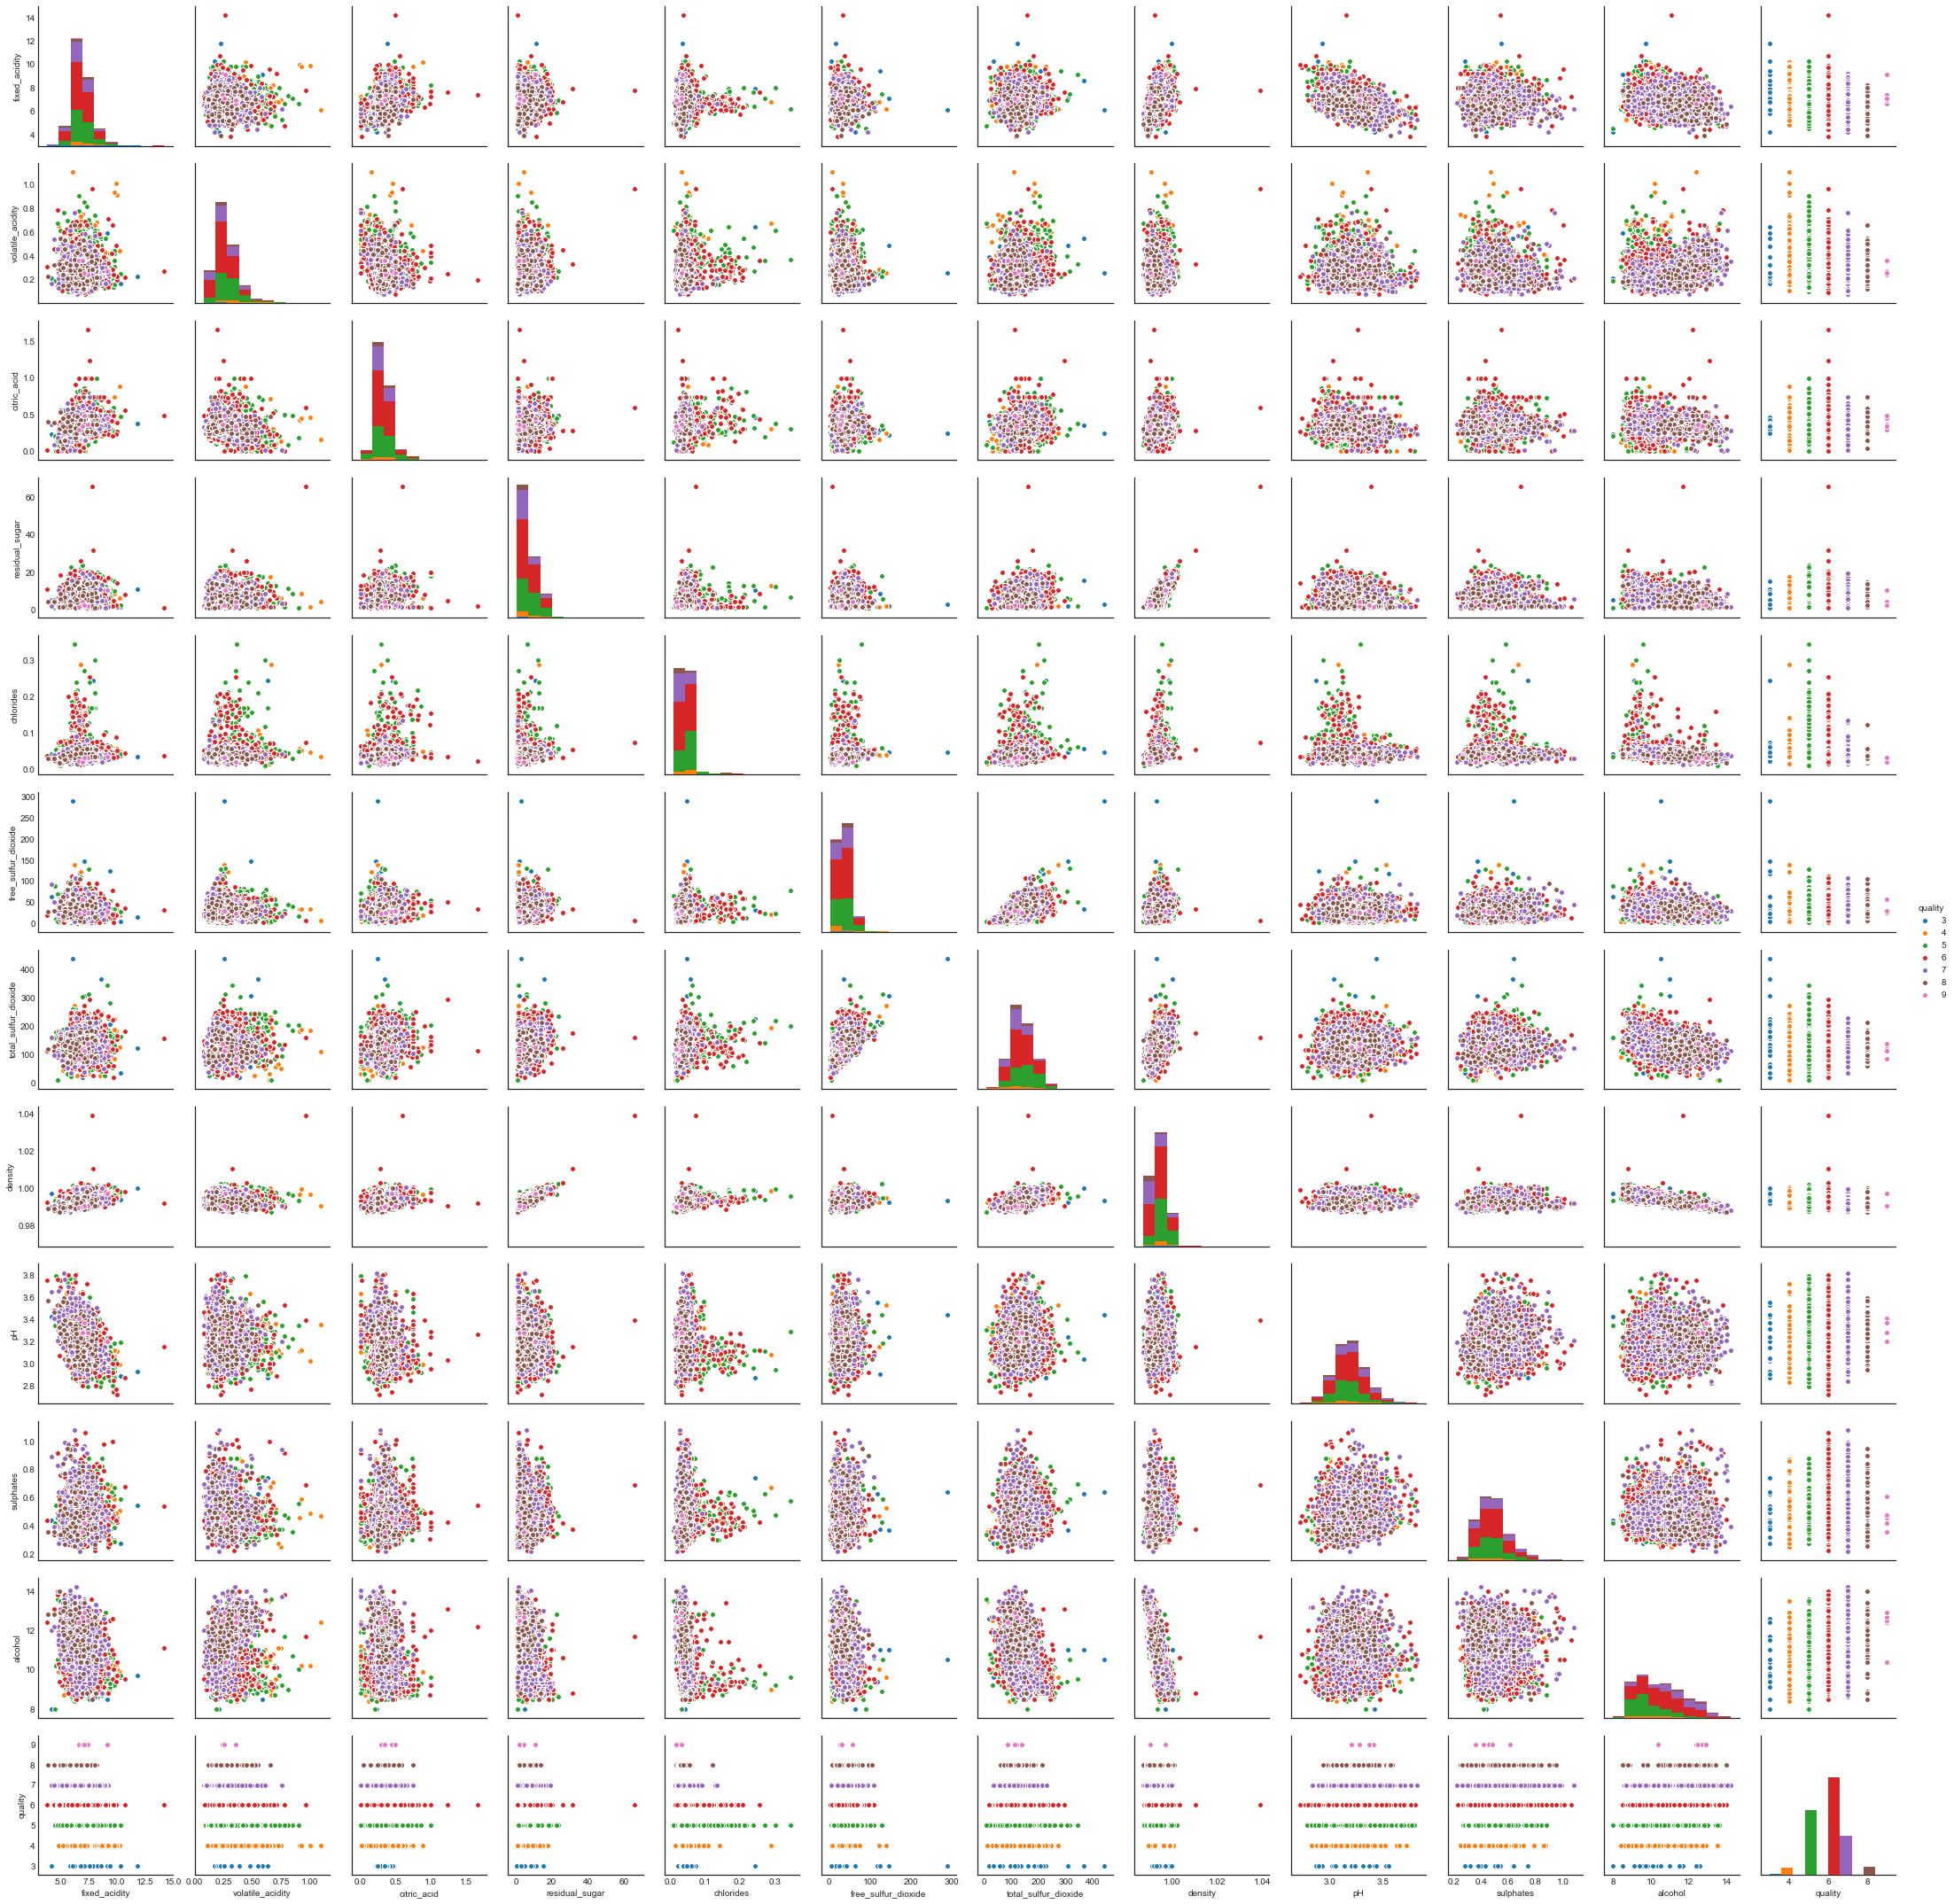

In [18]:
sns.pairplot(df, hue="quality")

# Add Features

In [ ]:
#Split quality into binary variable
df['good'] = np.where(df['quality'])